In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [326]:
df = pd.read_csv('./train.csv', header=None)
df.head()

,0,1,2,3,4,5
0,./labels/1.jpg,265,521,323,580,octagon
1,./labels/1.jpg,318,368,390,429,Hexagon
2,./labels/1.jpg,71,466,228,618,square
3,./labels/1.jpg,336,481,411,550,square
4,./labels/1.jpg,329,573,397,639,Hexagon


In [327]:
def get_unique(list_):
    temp_list = []
    
    for tt in list_:
        temp_list.append (tt.split('/')[-1])
        
    return np.unique(temp_list)

    
def cal_overlap (r1, r2, cls, th = 0.5):
    r1_x1 = r1[0]
    r1_y1 = r1[1]
    r1_x2 = r1[2]
    r1_y2 = r1[3]
    
    r2_x1 = r2[0]
    r2_y1 = r2[1]
    r2_x2 = r2[2]
    r2_y2 = r2[3]
    
    bg = np.zeros ((3000, 3000))
    
    bg[r2_y1:r2_y2, r2_x1:r2_x2] = 1
    bg_active = bg[r1_y1:r1_y2, r1_x1:r1_x2]
    
    temp = np.where (bg[r1_y1:r1_y2, r1_x1:r1_x2] == 1)
    area_whole = (r2_x2-r2_x1)*(r2_y2-r2_y1)
    
    
    ratio_ = len(temp[0])*1.0 / area_whole*1.0
    if ratio_ > th:
#         print ('ratio_: ', ratio_, ' (%d, %d)' % (len(temp), area_whole), ', cls: ', cls)
    
        return True
    return False

In [328]:
pid = get_unique(np.array(df[0]))

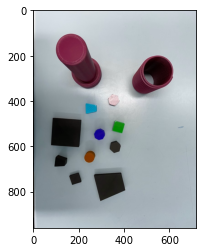

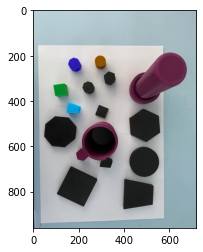

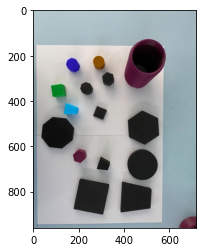

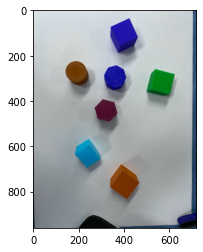

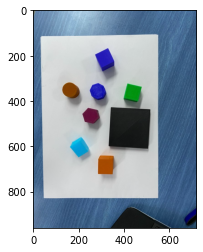

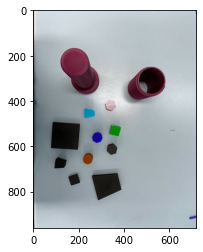

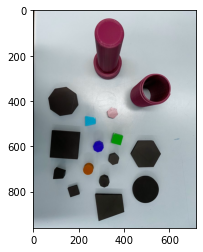

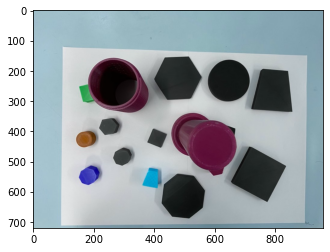

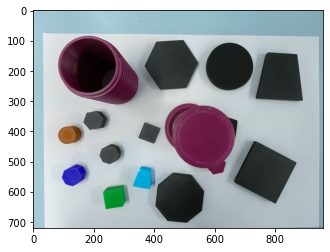

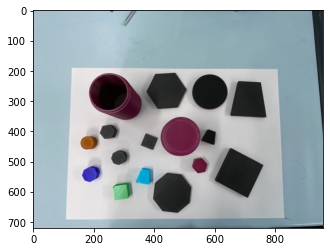

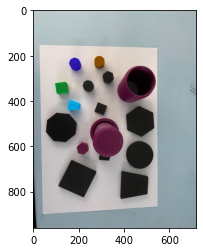

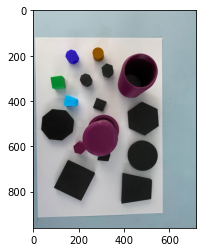

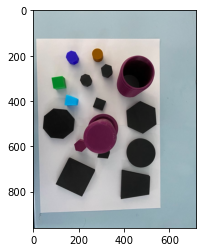

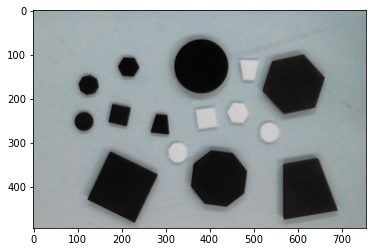

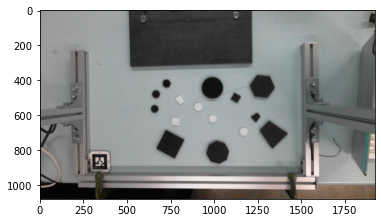

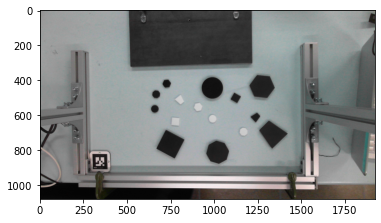

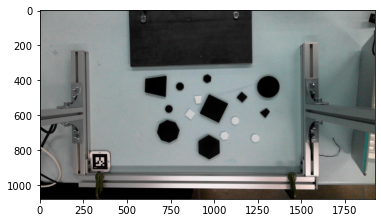

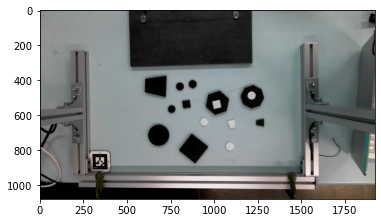

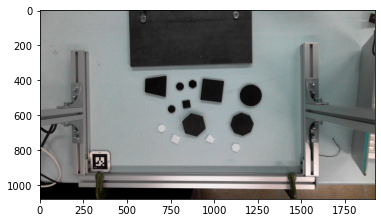

In [329]:
change_list = []

for pid_ in pid:
    
    
    img = cv2.imread('./labels/{}'.format(pid_))
    img_org = cv2.imread('./labels/{}'.format(pid_))
    plt.imshow(img)
    plt.show()
    
    info = df[df[0] == './labels/{}'.format(pid_)]
    info.head()
    
    list_info = []
    for i in info.values:
        list_info.append (i)
        img = cv2.rectangle(img.astype(np.float32), (i[1], i[2]), (i[3], i[4]), (255, 0, 0), 5)
        
    
#     print ('list_coord: ', list_coord)
    
    h, w, _ = img.shape

    n = 3
    for i in np.arange(0, h, h//n):

        if (i+(h//n)-1) > h:
            break
        for j in np.arange(0, w, w//n):            
            if (j+(w//n)-1) > w:
                break
            
#             plt.imshow(img.astype(np.uint8)[i:i+h//2,j:j+w//2])
#             plt.show()
            
            for k in list_info:
                r2_x1 = int(k[1])
                r2_y1 = int(k[2])
                r2_x2 = int(k[3])
                r2_y2 = int(k[4])
                
                is_overlap = cal_overlap ((j, i, j+w//2, i+h//2), (r2_x1, r2_y1, r2_x2, r2_y2), k[5])
                
                if is_overlap == True:
                    
                    offset_x1 = r2_x1 - j
                    offset_x2 = r2_x2 - j
                    
                    offset_y1 = r2_y1 - i                    
                    offset_y2 = r2_y2 - i
                    
                    #print ('1, ', offset_x1, offset_y1, offset_x2, offset_y2)
                    if offset_x1 < 0: offset_x1 = 0
                    if offset_y1 < 0: offset_y1 = 0
        
                    #print ('2, ', offset_x1, offset_y1, offset_x2, offset_y2)
                    
                    name_ = '{}_ij_%d_%d.jpg'.format(k[0][:-4]) % (i,j)
                    change_list.append ([name_, offset_x1, offset_y1, offset_x2, offset_y2, k[5]])
                    cv2.imwrite ('./cropped/{}'.format(name_.split('/')[-1]), img_org[i:i+h//2,j:j+w//2])
    #break

In [330]:
change_list

[['./labels/1_ij_0_0.jpg', 318, 368, 390, 429, 'Hexagon'],
 ['./labels/1_ij_0_0.jpg', 83, 97, 316, 349, 'circle bolt'],
 ['./labels/1_ij_0_0.jpg', 220, 404, 293, 465, 'trapezoid'],
 ['./labels/1_ij_0_240.jpg', 78, 368, 150, 429, 'Hexagon'],
 ['./labels/1_ij_0_240.jpg', 192, 193, 387, 386, 'circle nut'],
 ['./labels/1_ij_0_240.jpg', 0, 404, 53, 465, 'trapezoid'],
 ['./labels/1_ij_0_480.jpg', 0, 193, 147, 386, 'circle nut'],
 ['./labels/1_ij_320_0.jpg', 265, 201, 323, 260, 'octagon'],
 ['./labels/1_ij_320_0.jpg', 318, 48, 390, 109, 'Hexagon'],
 ['./labels/1_ij_320_0.jpg', 71, 146, 228, 298, 'square'],
 ['./labels/1_ij_320_0.jpg', 214, 300, 288, 358, 'cylinder'],
 ['./labels/1_ij_320_0.jpg', 220, 84, 293, 145, 'trapezoid'],
 ['./labels/1_ij_320_0.jpg', 73, 312, 161, 369, 'trapezoid'],
 ['./labels/1_ij_320_240.jpg', 25, 201, 83, 260, 'octagon'],
 ['./labels/1_ij_320_240.jpg', 78, 48, 150, 109, 'Hexagon'],
 ['./labels/1_ij_320_240.jpg', 96, 161, 171, 230, 'square'],
 ['./labels/1_ij_320_240

In [331]:
pd.DataFrame(data=change_list).to_csv('./train_crop.csv', index=False, header=False)